# Decomposição Polifásica

Considere o filtro FIR $H(z) = 1 + 2 z^{-1} + 3 z^{-2} + 4 z^{-3}$. Podemos reescrevê-lo como $H(z) = (1+3z^{-2}) + z^{-1}(2+4z^{-2})$, realizando assim a separação em 2 fases.

De forma geral, para um filtro FIR $H(z) = \sum_{n=-\infty}^{\infty} h[n] z^{-n}$ podemos separar e agrupar os coeficientes pares e ímpares (para realizar a separação em duas fases):

$H(z) = \sum_{n=-\infty}^{\infty} h[2n] z^{-2n} + z^{-1}\sum_{n=-\infty}^{\infty} h[2n+1] z^{-2n} = E_0(z^2) + z^{-1} E_1(z^2)$, onde definimos

$E_0(z) = \sum_{n=-\infty}^{\infty} h[2n] z^{-n}$


$E_1(z) = \sum_{n=-\infty}^{\infty} h[2n+1] z^{-n}$

Para o exemplo $H(z) = 1 + 2 z^{-1} + 3 z^{-2} + 4 z^{-3}$ temos:

$H(z) = (1+3z^{-2}) + z^{-1}(2+4z^{-2})$

$E_0(z) = 1 + 3z^{-1}$

$E_1(z) = 2 + 4z^{-1}$

Vamos fazer abaixo alguns exemplos no GNU Octave.

Iremos utilizar algumsa funções do pacote *signal*. Logo, devemos inicialmente carregar o pacote.

In [1]:
pkg load signal

Vamos criar um exemplo simples. Temos um sequência $x[n]$ e um filtro FIR com resposta ao impulso $h[n]$, conforme abaixo:

In [2]:
x = [1 2 3 4 5 6 7 8 9 10];
h = [0.5 0.25 0.75 -0.25];

A saída $y[n]$ é dada pela convolução: $y[n] = x[n] \circledast h[n] $

![](imgs/sistema.png)

In [3]:
lx = length(x);
ya = cconv(x,h,lx);

Se após o filtro $h$ temos um downsample por um fator $M$, observe que $M-1$ a cada $M$ amostras serão descartadas.

![](imgs/sistema_downsample.png)

Para $M=2$ teremos:

In [4]:
y = downsample(ya,2)

y =

    7.75000    0.25000    5.25000    7.75000   10.25000



Utilizando a identidade do downsample, podemos implementar um filtro seguido de downsample utilizando a forma polifásica:

![](imgs/polifasico.png)
Fonte: (Oppenheim 2009)

Vamos agora implementar a decomposição polifásica com $M=2$.

In [5]:
% separação as fases de x[n]
x0 = downsample(x,2);
x1 = downsample(shift(x,-1),2);

% separação das fases de h[n]
h0 = downsample(h,2);
h1 = downsample(shift(h,-1),2);

% convolução em cada uma das fases
y0 = cconv(x0,h0,lx/2);
y1 = cconv(x1,h1,lx/2);

% soma das componentes de fase resultante
y0 + shift(y1,1)

ans =

    7.75000    0.25000    5.25000    7.75000   10.25000



Observe que obtivemos acima o mesmo resultado obtido anteriormente.

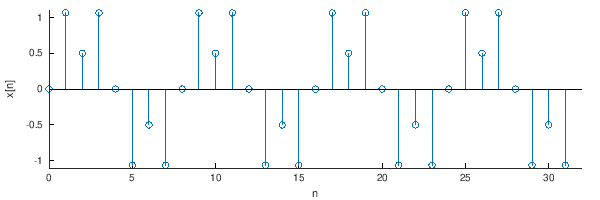

In [6]:
n_samples = 32;
n = [0:n_samples-1];
w1 = pi/4; w2 = 3*pi/4;
x = sin(n*w1) + 0.5*sin(n*w2);
figure(1, 'position',[0,0,600,200]);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]);

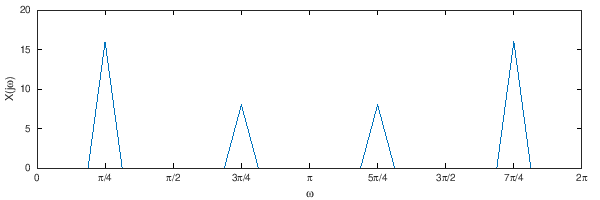

In [7]:
X = fft(x);
figure(2, 'position',[0,0,600,200]);
w = linspace(0,2*pi,length(n)+1); w = w(1:end-1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

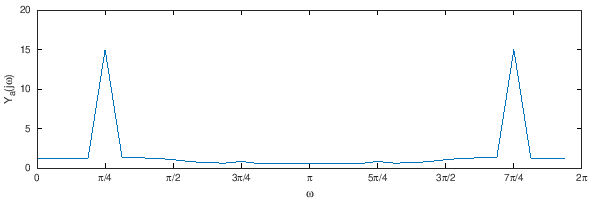

In [8]:
# FIR 
# exemplo Butterworth
p = 4; wc = 0.5;
[b,a] = butter(p,wc);  % filtro butterworth de ordem e frequencia de corte wc*pi

ya = filter(b,a,x);
Ya = fft(ya);
figure(3, 'position',[0,0,600,200]);
plot(w,abs(Ya)); xlim([0 2*pi]); xlabel('\omega'); ylabel('Y_a(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

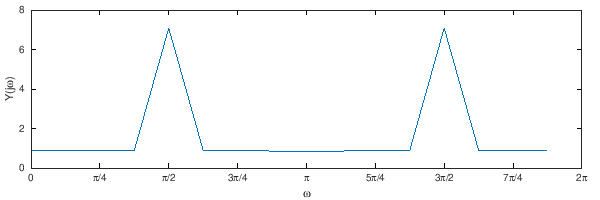

In [9]:
y = downsample(ya,2);
Y = fft(y);
figure(4, 'position',[0,0,600,200]);
w = linspace(0,2*pi,length(n)/2+1); w = w(1:end-1);
plot(w,abs(Y)); xlim([0 2*pi]); xlabel('\omega'); ylabel('Y(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

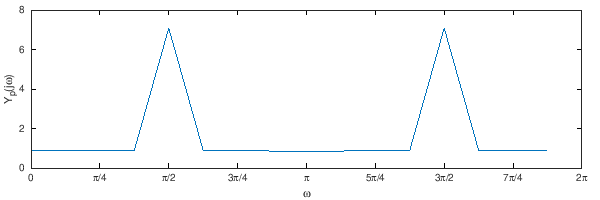

In [10]:
# polyphase (2 fases)
b0 = downsample(b,2);
b1 = downsample(shift(b,-1),2);
a0 = a1 = [1, zeros(1, length(b0)-1)];

x0 = downsample(x,2);
x1 = downsample(shift(x,-1),2);

y0 = filter(b0,a0,x0);
y1 = filter(b1,a1,x1);

yp = y0 + shift(y1,1);
Yp = fft(yp);
figure(5, 'position',[0,0,600,200]);
plot(w,abs(Y)); xlim([0 2*pi]); xlabel('\omega'); ylabel('Y_p(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

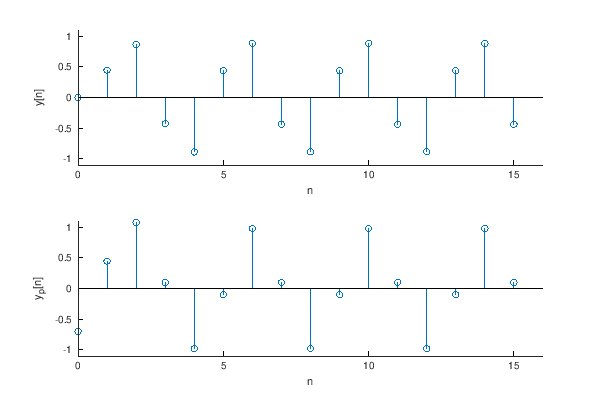

In [11]:
nd = [0:n_samples/2-1];
figure(6, 'position',[0,0,600,400]);
subplot(2,1,1); stem(nd,y); xlabel('n'); ylabel('y[n]'); ylim([-1.1, 1.1]); xlim([0, nd(end)+1]);
subplot(2,1,2); stem(nd,yp); xlabel('n'); ylabel('y_p[n]'); ylim([-1.1, 1.1]); xlim([0, nd(end)+1]);

  Os filtros $E_k(z)$ possuem comprimento $N/M$ e estão a uma taxa $1/M$ em relação ao original.
  Consequentemente, cada filtro fará $\frac{1}{M}\left(\frac{N}{M}\right)$ multiplicações 
  e $\frac{1}{M}\left(\frac{N}{M}-1\right)$ adições por unidade de tempo. Como são $M$ componentes 
  polifásicas o sistema requererá $N/M$ multiplicações e $\left(\frac{N}{M}-1\right)+(M-1)$ adições
  por unidade de tempo.